In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex7')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")



C:\Users\Administrator\Desktop\ml_ipynb\ex7


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import general
from helper import pca


 # 使用2维数据进行PCA

 ## 1 加载数据和展示

(50, 2)


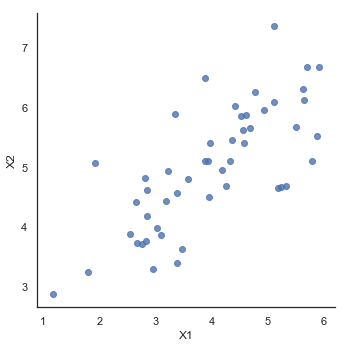

In [3]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')
# visualize raw data
print(X.shape)
sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False)


 ## 2 开始运行算法
 首先均值归一
 可以看到,数据基本在-1,1之间

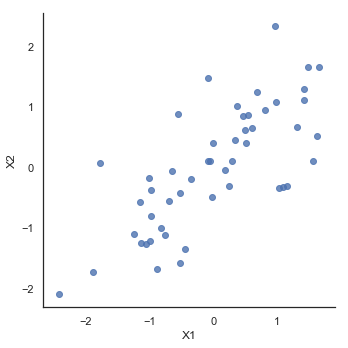

In [4]:
X_norm = pca.normalize(X)
sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False)



 协方差矩阵

In [5]:
Sigma = pca.covariance_matrix(X_norm)  # capital greek Sigma
Sigma  # (n, n)



array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

  开始运行PCA

In [6]:
U, S, V = pca.pca(X_norm)
Z = pca.project_data(X_norm, U, 1)
Z[:10]


array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

 ## 4 展示降维后的数据

Text(0.5, 1.0, 'Z dimension')

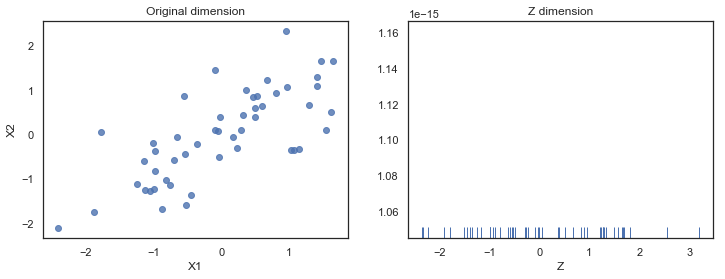

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)
ax1.set_title('Original dimension')

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('Z dimension')




 ## 5 看看恢复数据

Text(0.5, 1.0, 'Original dimension')

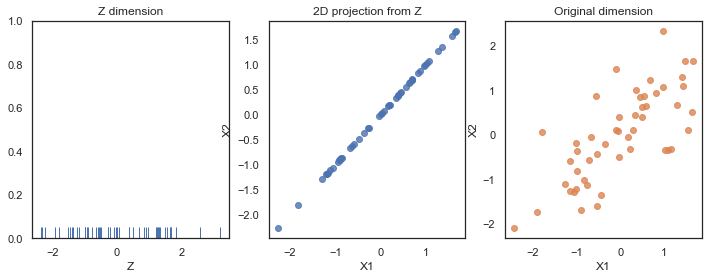

In [8]:
X_recover = pca.recover_data(Z, U)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))

sns.rugplot(Z, ax=ax1)
ax1.set_title('Z dimension')
ax1.set_xlabel('Z')

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax2)
ax2.set_title("2D projection from Z")

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax3)
ax3.set_title('Original dimension')
